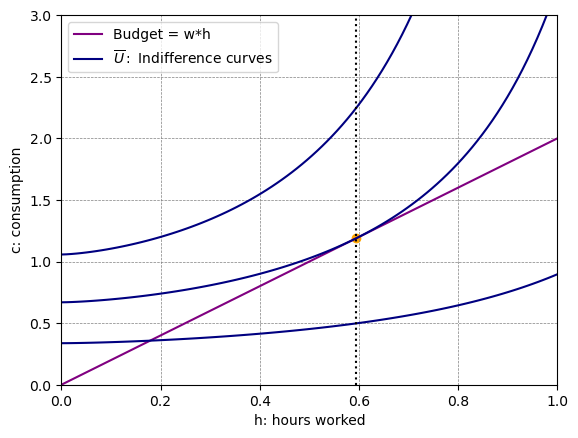

0.5946035575013605
0.5623413251903491


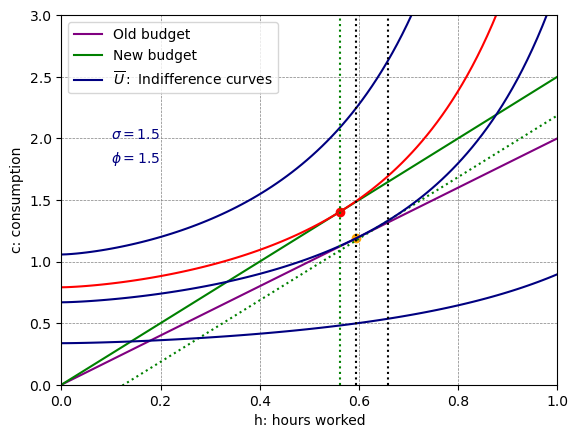

0.6299508222165294
0.6299414516133613


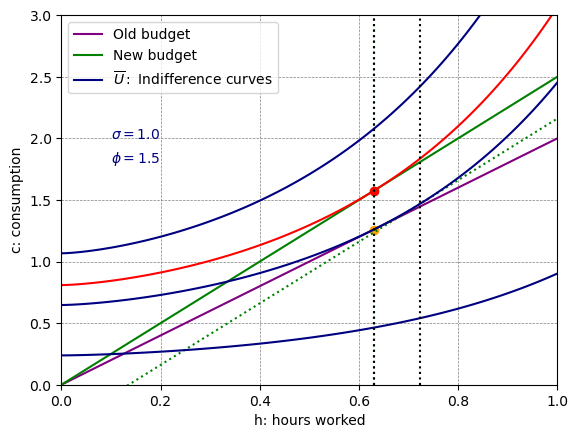

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


## Wage optimality from utility: h^(φ-1)/c^(-σ) = w
## Wage optimality from firm: y = Ah 

A = 0.5
σ = 1.5
φ = 1.5
w = 2
α = 0.4
B = 2
hvec = np.linspace(0,1,100)

def solve_pe(w,hvec,α,φ,σ):
    cvec =   hvec*w
    ## Solution of the problem
    # B*h**(φ-1)/c**(-σ) = (1-α) * A*h**(-α) //Optimality
    # c = A*h**(1-α) //Market clearing
    
    hmax = ( (w**(1-σ))/B )**(1/(σ-1+φ))

    cmax = hmax*w 
    umax = (cmax**(1-σ)-1) / (1-σ) - B/φ * hmax**(φ) 
    #Indifference curves
    cvec = ((umax+B/φ *hvec**(φ) )*(1-σ)+1 )**(1/(1-σ))
    cvec1 = ((umax+0.5+B/φ *hvec**(φ) )*(1-σ)+1 )**(1/(1-σ))
    cvec2 = ((umax-1+B/φ *hvec**(φ) )*(1-σ)+1 )**(1/(1-σ))

    #Budget
    cwage = hvec*w +cmax-hmax*w
    return cvec,hmax,w,cmax,umax,cvec,cvec1,cvec2

def solv_subs(hguess, ulev, w,φ,σ):
    csubs =  (B/w * hguess **(φ - 1))**(-1/σ)
    usubs = (csubs**(1-σ)-1) / (1-σ) - B/φ *hguess**(φ) 
    return (usubs-ulev)**2
    
w =2
cvec,hmax,wmax,cmax,umax,cvec,cvec1,cvec2 = solve_pe(w,hvec,α,φ,σ)
plt.plot(hvec,hvec*w, color = 'purple', label = r'Budget = w*h')
plt.plot(hvec,cvec, color = 'navy', label = r'$\overline{U}:$ Indifference curves')
plt.plot(hvec,cvec1, color = 'navy')
plt.plot(hvec,cvec2, color = 'navy')
plt.ylim(0,3)
plt.xlim(0,1)
plt.xlabel('h: hours worked')
plt.ylabel('c: consumption')
plt.axvline(hmax, linestyle = 'dotted', color = 'black')
plt.scatter(hmax,cmax,color = 'orange')
plt.legend()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('standard_model_pe15.pdf')
plt.show()


wnew=2.5
ncvec,nhmax,nwmax,ncmax,numax,ncvec,nn,nn1 = solve_pe(wnew,hvec,α,φ,σ)
hguess = nhmax
print(hmax)
print(nhmax)
## solve for h under substitution effect
solv = optimize.minimize_scalar(solv_subs, hguess, bounds=(0 , 1), args=(umax, wnew,φ,σ)) 
hsubs = solv.x
csubs = (B/wnew * hsubs **(φ - 1))**(-1/σ) ##c for substitution effect

plt.scatter(hmax,cmax,color = 'orange')
plt.scatter(nhmax,ncmax,color = 'red')
plt.plot(hvec,hvec*w, color = 'purple', label = r'Old budget')
plt.plot(hvec,hvec*wnew, color = 'green', label = r'New budget')
plt.plot(hvec,hvec*wnew + (csubs-wnew*hsubs), color = 'green',linestyle = 'dotted')
plt.plot(hvec,cvec, color = 'navy', label = r'$\overline{U}:$ Indifference curves')
plt.plot(hvec,cvec1, color = 'navy')
plt.plot(hvec,cvec2, color = 'navy')
plt.plot(hvec,ncvec, color = 'red')
plt.ylim(0,3)
plt.xlim(0,1)
plt.annotate(r'$ \sigma = $' + str(np.round(σ,2)),(0.1,2),color = 'navy')
plt.annotate(r'$ \phi = $' + str(φ),(0.1,1.8),color = 'navy')

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axvline(nhmax, linestyle = 'dotted', color = 'green')
plt.axvline(hsubs, linestyle = 'dotted', color = 'black')
plt.axvline(hmax, linestyle = 'dotted', color = 'black')
plt.xlabel('h: hours worked')
plt.ylabel('c: consumption')
plt.legend(loc = 'upper left')
plt.savefig('standard_model_pe_subs15.pdf')
plt.show()

## Same graph with close-to-log utility
σ = 1.0001
cvec,hmax,wmax,cmax,umax,cvec,cvec1,cvec2 = solve_pe(w,hvec,α,φ,σ)
ncvec,nhmax,nwmax,ncmax,numax,ncvec,nn,nn1 = solve_pe(wnew,hvec,α,φ,σ)
hguess = nhmax
print(hmax)
print(nhmax)
## solve for h under substitution effect
solv = optimize.minimize_scalar(solv_subs, hguess, bounds=(0 , 1), args=(umax, wnew,φ,σ)) 
hsubs = solv.x
csubs = (B/wnew * hsubs **(φ - 1))**(-1/σ) ##c for substitution effect

plt.scatter(hmax,cmax,color = 'orange')
plt.scatter(nhmax,ncmax,color = 'red')
plt.plot(hvec,hvec*w, color = 'purple', label = r'Old budget')
plt.plot(hvec,hvec*wnew, color = 'green', label = r'New budget')
plt.plot(hvec,hvec*wnew + (csubs-wnew*hsubs), color = 'green',linestyle = 'dotted')
plt.plot(hvec,cvec, color = 'navy', label = r'$\overline{U}:$ Indifference curves')
plt.plot(hvec,cvec1, color = 'navy')
plt.plot(hvec,cvec2, color = 'navy')
plt.plot(hvec,ncvec, color = 'red')
plt.ylim(0,3)
plt.xlim(0,1)
plt.annotate(r'$ \sigma = $' + str(np.round(σ,2)),(0.1,2),color = 'navy')
plt.annotate(r'$ \phi = $' + str(φ),(0.1,1.8),color = 'navy')

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.axvline(nhmax, linestyle = 'dotted', color = 'green')
plt.axvline(hsubs, linestyle = 'dotted', color = 'black')
plt.axvline(hmax, linestyle = 'dotted', color = 'black')
plt.xlabel('h: hours worked')
plt.ylabel('c: consumption')
plt.legend(loc = 'upper left')
plt.savefig('standard_model_pe_subs1.pdf')
plt.show()

C:\Users\qwp970\AppData\Local\Temp\ipykernel_21400\1913494346.py:5: RuntimeWarning: divide by zero encountered in power
  cvec =   (1/B*hvec**(φ-1)/w)**(-1/σ)


0.4481755710850832


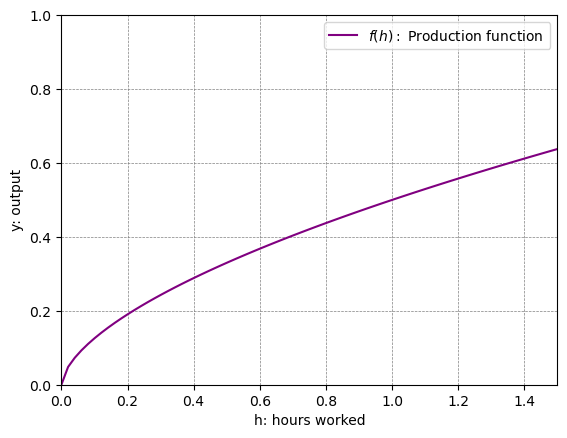

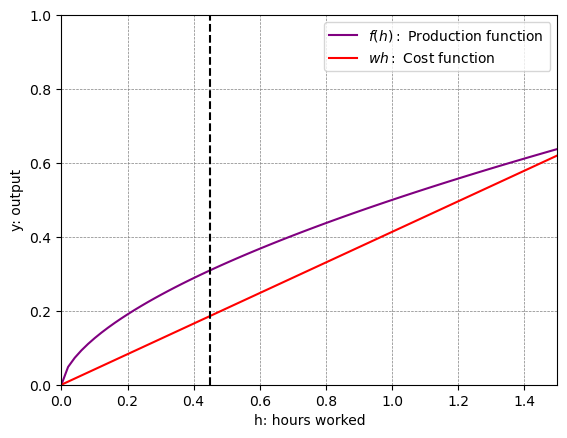

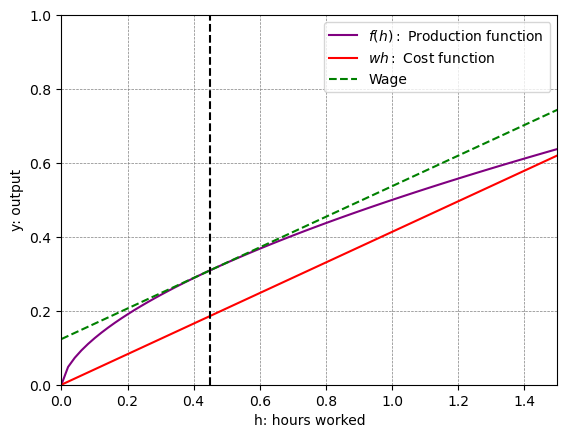

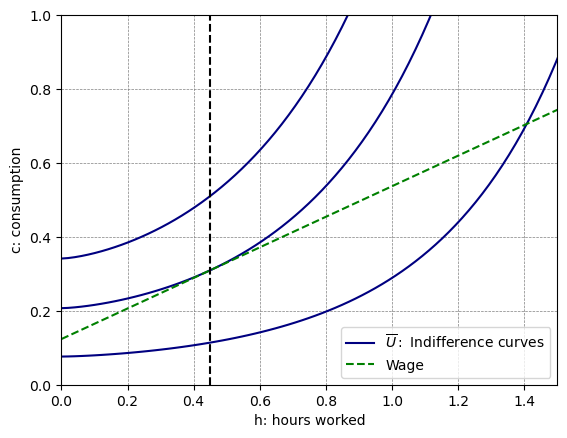

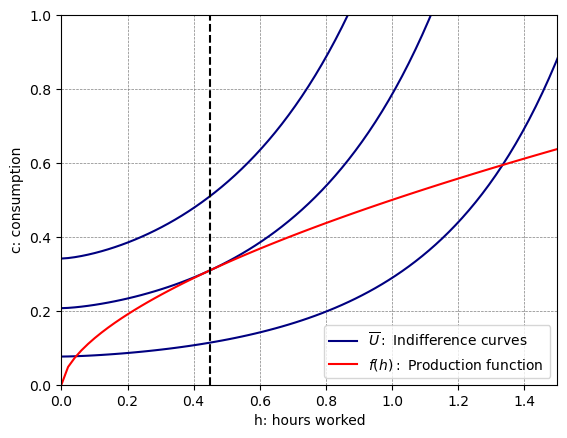

In [2]:
## General equilibrium model
hvec = np.linspace(0,2,100)
def solve_standard(A,hvec,α,φ,σ):
    yvec = A*hvec**(1-α)
    cvec =   (1/B*hvec**(φ-1)/w)**(-1/σ)
    ## Solution of the problem
    # B* h**(φ-1)/c**(-σ) = (1-α) * A*h**(-α) //Optimality
    # c = A*h**(1-α) //Market clearing
    
    hmax = ( (A**(1-σ)*(1-α)/B ) )**(1/((1-α)*σ-1+α+φ))
    wmax = A*(1-α)*hmax**(-α)
    cmax = A*hmax**(1-α) #market clearing
    # Utilty = (c**(1-σ)-1) / (1-σ) -hvec**(φ) 
    umax = (cmax**(1-σ)-1) / (1-σ) -B/φ*hmax**(φ) 
    
    cvec = ((umax+B/φ*hvec**(φ) )*(1-σ)+1 )**(1/(1-σ))
    cvec1 = ((umax+0.5+B/φ*hvec**(φ) )*(1-σ)+1 )**(1/(1-σ))
    cvec2 = ((umax-1+B/φ*hvec**(φ) )*(1-σ)+1 )**(1/(1-σ))
    
    cwage = hvec*wmax +cmax-hmax*wmax
    return yvec,cvec,hmax,wmax,cmax,umax,cvec,cvec1,cvec2, cwage
    
yvec,cvec,hmax,wmax,cmax,umax,cvec,cvec1,cvec2,cwage = solve_standard(A,hvec,α,φ,σ)
print(hmax)
plt.plot(hvec,yvec, color = 'purple', label = r'$f(h):$ Production function ')
plt.ylim(0,1)
plt.xlim(0,1.5)
plt.xlabel('h: hours worked')
plt.ylabel('y: output')
plt.legend()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('standard_model_firm.pdf')
plt.show()

plt.plot(hvec,yvec, color = 'purple', label = r'$f(h):$ Production function ')
plt.plot(hvec,wmax*hvec, color = 'red', label = r'$wh:$ Cost function ')
plt.ylim(0,1)
plt.xlim(0,1.5)
plt.axvline(hmax, linestyle = 'dashed', color = 'black')
plt.xlabel('h: hours worked')
plt.ylabel('y: output')
plt.legend()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('standard_model_firm1.pdf')
plt.show()

plt.plot(hvec,yvec, color = 'purple', label = r'$f(h):$ Production function ')
plt.plot(hvec,wmax*hvec, color = 'red', label = r'$wh:$ Cost function ')
plt.plot(hvec,cwage, color = 'green', label = r'Wage', linestyle = 'dashed')
plt.ylim(0,1)
plt.xlim(0,1.5)
plt.axvline(hmax, linestyle = 'dashed', color = 'black')
plt.xlabel('h: hours worked')
plt.ylabel('y: output')
plt.legend()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('standard_model_firm2.pdf')
plt.show()

plt.plot(hvec,cvec, color = 'navy', label = r'$\overline{U}:$ Indifference curves')
plt.plot(hvec,cvec1, color = 'navy')
plt.plot(hvec,cvec2, color = 'navy')
plt.plot(hvec,cwage, color = 'green', label = r'Wage', linestyle = 'dashed')
plt.ylim(0,1)
plt.xlim(0,1.5)
plt.axvline(hmax, linestyle = 'dashed', color = 'black')
plt.xlabel('h: hours worked')
plt.ylabel('c: consumption')
plt.legend()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('standard_model_worker.pdf')
plt.show()


plt.plot(hvec,cvec, color = 'navy', label = r'$\overline{U}:$ Indifference curves')
plt.plot(hvec,cvec1, color = 'navy')
plt.plot(hvec,cvec2, color = 'navy')
plt.plot(hvec,yvec, color = 'red', label = r'$f(h):$ Production function ')
plt.ylim(0,1)
plt.xlim(0,1.5)
plt.axvline(hmax, linestyle = 'dashed', color = 'black')
plt.xlabel('h: hours worked')
plt.ylabel('c: consumption')
plt.legend()
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.savefig('standard_model.pdf')
plt.show()

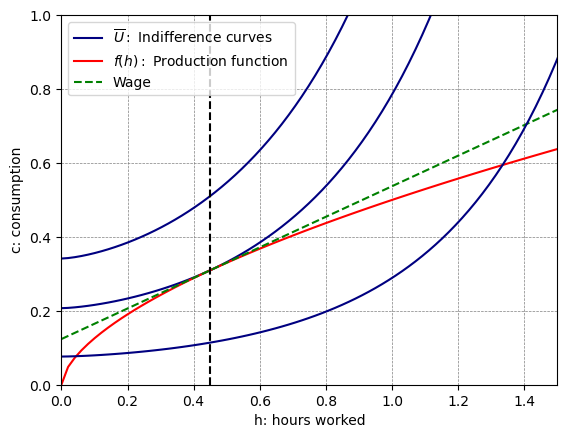

In [3]:
## Draw in the wage
plt.plot(hvec,cvec, color = 'navy', label = r'$\overline{U}:$ Indifference curves')
plt.plot(hvec,yvec, color = 'red', label = r'$f(h):$ Production function ')
plt.plot(hvec,cwage, color = 'green', label = r'Wage', linestyle = 'dashed')
plt.plot(hvec,cvec1, color = 'navy')
plt.plot(hvec,cvec2, color = 'navy')
plt.ylim(0,1)
plt.xlim(0,1.5)
plt.axvline(hmax, linestyle = 'dashed', color = 'black')
plt.xlabel('h: hours worked')
plt.ylabel('c: consumption')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.savefig('standard_model1.pdf')
